In [89]:
import numpy as np
import matplotlib.pyplot as plt

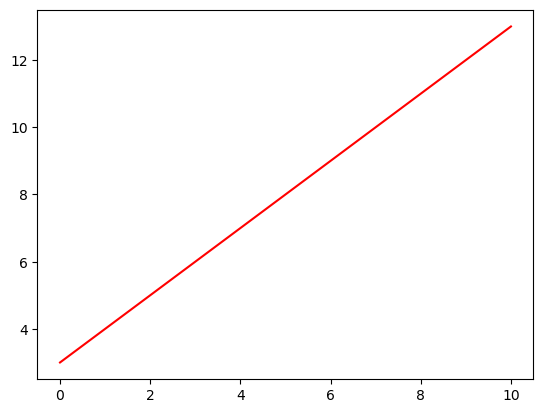

In [90]:
np.random.seed(42)
# y = ax + b | a = inclinacion, b = altura
inclinacion = 0
altura = 5

# objetivo y = 1*x + 3
plt.plot([0,10],[3,13],color='red')
plt.show()


In [91]:
def genera_datos(n):
    x = np.linspace(0, 10, n)
    y = x + 3 + np.random.randn(n)
    return x, y


In [92]:
x_array, y_array = genera_datos(30)


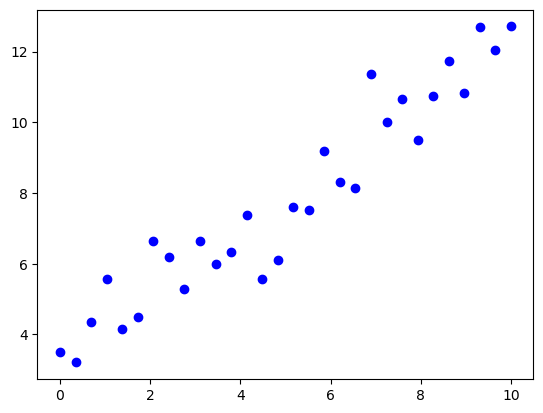

In [93]:
def conectar_puntos(array1, array2):
    for i in range(len(array1)):
        plt.plot(array1[i:i+2], array2[i:i+2], 'red')

#plt.plot([0,10],[3,13],color='grey')

plt.scatter(x_array, y_array, color='blue')
#conectar_puntos(x_array, y_array)
plt.show()

* buscar linea aleatoria

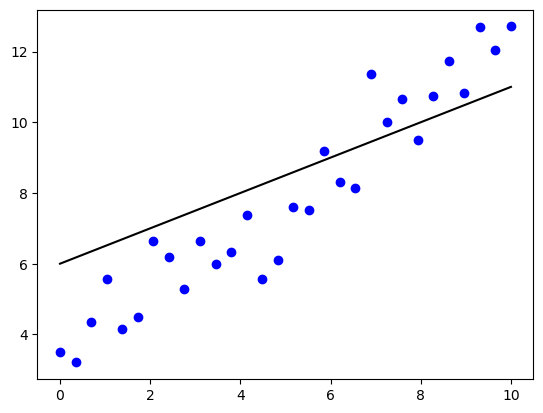

In [94]:
linea_x = [0,10]
linea_y = [6,11]
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')

* Funcion para predecir la 'y' correcta para un punto de una linea

In [95]:
def predice_y(x, a, b):
    y_hat = a*x + b
    return y_hat

* Funcion de error

In [96]:
def error(linea,a,b):
    y_hat = predice_y(linea[0],a,b)
    error = y_hat - linea[1]
    return error

* Funcion de coste

In [97]:
def coste(linea,a,b):
    error2 = error(linea,a,b)
    error_cuadratico =  error2 ** 2
    coste = error_cuadratico.mean()
    return coste


5.0


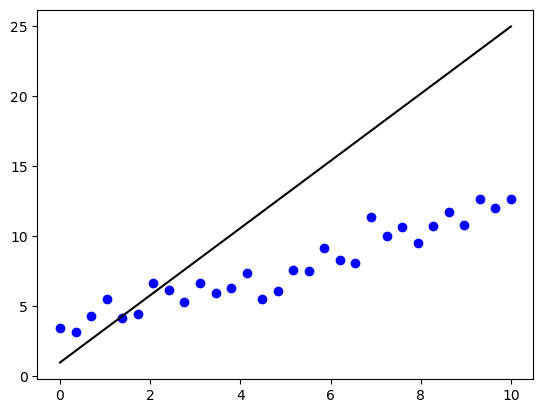

In [98]:
linea_x = np.array([0,10])
linea_y = np.array([1,25]) 
linea = [linea_x, linea_y]
a = 2
b = 2
print(coste(linea,a,b))
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')

a: 1.9999999989669375, b: 9.999999999966137


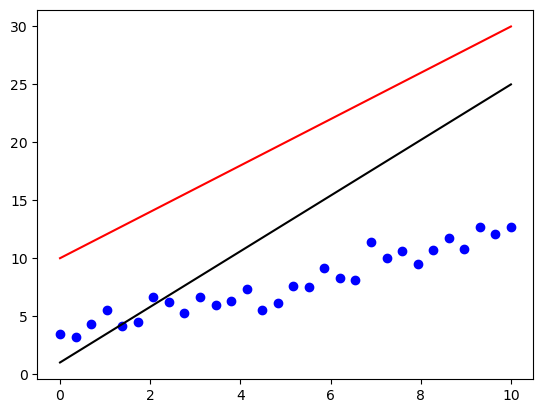

In [105]:
learning_rate = 0.0001    

coste1 = 1
def derivada(n1,n2):
    n1_fin = n1 + 0.000001
    n2_fin = n2 + 0.000001
    derivada = (n2_fin-n2)/ (n1_fin-n1)
    return derivada

def derivada_a_real(n1,n2):
    derivada = 2 * error(n1,n2)
    derivada *=n1
    derivada = derivada.mean()
    return derivada
def derivada_b_real(n1,n2):
    derivada = 2 * error(n1,n2)
    derivada = derivada.mean()
    return derivada


a=2
b=10


costeinicial = 200
signo = 1
for i in range(90000):
    a  -= learning_rate * derivada(coste1, a) * signo
    b  -= learning_rate * derivada(coste1, b) * signo
    coste1 = coste(linea,a,b)
    if(coste1>costeinicial):
        signo = -1
    else:
        signo = 1
    costeinicial = coste1
    

print(f"a: {a}, b: {b}")
linea = predice_y(np.array([0,10]), a, b)
plt.plot([0,10],linea,color='red')
plt.plot(linea_x, linea_y, color='black')
plt.scatter(x_array, y_array, color='blue')
    